In [1]:
import yfinance
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [34]:
portfolio_composition = [('PSX',0.5),('DOW',0.2),('EMN',0.3)]

returns = pd.DataFrame({})

In [35]:
for t in portfolio_composition:
  name = t[0]
  ticker = yfinance.Ticker(name)
  data = ticker.history(interval="1d",start="2021-02-10",end="2021-02-27")
  data['return_%s' % (name)] = data['Close'].pct_change(1)

  returns = returns.join(data[['return_%s' % (name)]],how="outer").dropna()

In [36]:
returns

,return_PSX,return_DOW,return_EMN
Date,,,
2021-02-11,0.006778,0.000000,0.013130
2021-02-12,-0.000129,0.008323,0.025827
2021-02-16,0.027968,0.010318,0.009979
2021-02-17,0.015745,-0.003574,-0.000634
2021-02-18,-0.007316,-0.016741,-0.012608
2021-02-19,0.039924,0.049166,0.028110
2021-02-22,0.020046,0.034608,0.013313
2021-02-23,0.018699,-0.005762,-0.009258
2021-02-24,0.020110,0.025274,0.008989


In [37]:
def simulate_returns(historical_returns,forecast_days):
  return historical_returns.sample(n = 20, replace = True).reset_index(drop = True)

In [41]:
simulate_returns(returns['return_DOW'],1000)

0    -0.003574
1    -0.003574
2     0.049166
3    -0.026036
4     0.025274
5     0.000000
6     0.008323
7     0.049166
8    -0.003574
9    -0.026036
10   -0.033252
11    0.049166
12   -0.003574
13   -0.026036
14    0.034608
15    0.000000
16    0.025274
17   -0.005762
18   -0.033252
19    0.008323
Name: return_DOW, dtype: float64

In [42]:
def simulate_portfolio(historical_returns,composition,forecast_days):
  result = 0
  for t in composition:
    name,weight = t[0],t[1]
    s = simulate_returns(historical_returns['return_%s' % (name)], forecast_days)
    result = result + s * weight
  
  return(result)

In [43]:
simulate_portfolio(returns,portfolio_composition,10)

0     0.008755
1     0.009529
2     0.012832
3     0.002214
4    -0.001675
5     0.026931
6    -0.000268
7     0.006485
8     0.021060
9     0.012957
10    0.012234
11    0.016359
12   -0.017051
13    0.004090
14   -0.006905
15    0.005755
16    0.000611
17   -0.017051
18   -0.007723
19   -0.013618
dtype: float64

In [44]:
def simulate_modified_returns(historical_returns,forecast_days):
  h = historical_returns.copy()

  new_series = h 

  return new_series.sample(n=forecast_days,replace=True).reset_index(drop=True)

In [45]:
def simulate_modified_portfolio(historical_returns,composition,forecast_days):
  result = 0
  for t in composition:
        # t is ('XOM',0.5)
    name,weight = t[0],t[1]
    s = simulate_modified_returns(historical_returns['return_%s' % (name)], forecast_days)
    result = result + s * weight
  
  return(result)

In [46]:
def simulation(historical_returns,composition,forecast_days,n_iterations):
  simulated_portfolios = None

  for i in range(n_iterations):
    sim = simulate_modified_portfolio(historical_returns,composition,forecast_days)

    sim_port = pd.DataFrame({'returns_%d' % (i) : sim})

    if simulated_portfolios is None:
      simulated_portfolios = sim_port
    else:
      simulated_portfolios = simulated_portfolios.join(sim_port)
    
  return simulated_portfolios

In [47]:
#simulations with corrections

In [48]:
returns.mean(axis=0)

return_PSX    0.008466
return_DOW    0.003848
return_EMN    0.003669
dtype: float64

In [112]:
portfolio_composition = [('PSX', 0.09,-0.20), ('DOW', 0.05,-0.15), ('EMN', 0.06,-0.25)]

In [113]:
forecast_days = 260
n_iterations = 200

In [114]:
simulated_portfolios = simulation(returns,portfolio_composition,forecast_days,n_iterations)

In [115]:
simulated_portfolios.head()

,returns_0,returns_1,returns_2,returns_3,returns_4,returns_5,returns_6,returns_7,returns_8,returns_9,...,returns_190,returns_191,returns_192,returns_193,returns_194,returns_195,returns_196,returns_197,returns_198,returns_199
0,-0.006054,0.000111,0.002939,0.001690,0.001127,-0.002391,0.002195,0.000482,0.002676,0.001209,...,0.001825,-0.003206,-0.001667,0.003617,-0.000298,0.001766,-0.000698,0.000375,-0.003556,-0.000990
1,0.000861,0.004720,0.001917,0.001121,0.000573,0.003253,0.002819,0.000725,0.000553,0.000603,...,0.000808,0.000725,0.003555,0.000277,-0.000465,0.000593,-0.001999,0.003158,0.001366,0.002721
2,-0.000798,-0.001119,0.003349,0.004230,0.003625,-0.004110,0.001836,-0.001557,0.000627,0.000090,...,0.002998,0.003253,-0.000234,0.000808,0.001307,0.000496,0.000905,0.001014,-0.000853,0.004219
3,-0.001161,0.005812,0.003613,0.001318,-0.001339,0.003454,0.003191,0.002578,0.003071,0.003312,...,0.001404,0.002479,-0.003248,0.004100,0.003025,0.000397,0.004474,0.001766,0.004025,0.005796
4,0.003619,0.004740,0.001512,0.001836,0.000638,-0.003012,0.004808,0.001204,0.002395,0.000299,...,0.002798,0.002188,0.002549,0.002599,0.001801,0.002288,-0.002332,0.001473,-0.003391,-0.000109


In [116]:
percentile_5th = simulated_portfolios.cumsum().apply(lambda x : np.percentile(x,5),axis=1)
percentile_95th = simulated_portfolios.cumsum().apply(lambda x : np.percentile(x,95),axis=1)
average_port = simulated_portfolios.cumsum().apply(lambda x : np.mean(x),axis=1)

In [117]:
print(percentile_5th.tail(1))
print(percentile_95th.tail(1))
print(average_port.tail(1))

259    0.242946
dtype: float64
259    0.371075
dtype: float64
259    0.307095
dtype: float64


In [118]:
#confidence interval for future portfolios

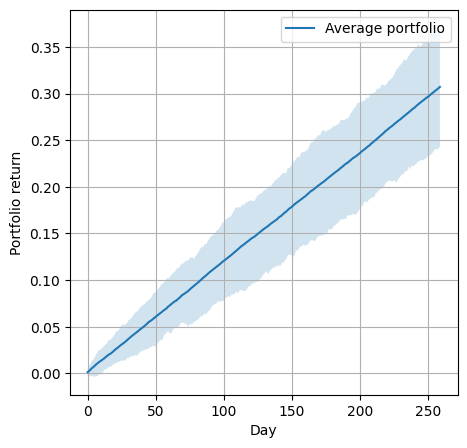

In [119]:
x = range(forecast_days)

plt.rcParams['figure.figsize'] = [5, 5]

plt.plot(x,average_port,label="Average portfolio")
plt.xlabel("Day")
plt.ylabel("Portfolio return")


plt.fill_between(x, percentile_5th, percentile_95th,alpha=0.2)
plt.grid()
plt.legend()

plt.show()

In [120]:
#confidence interval

In [121]:

target_return = 0.02

target_prob_port = simulated_portfolios.cumsum().apply(lambda x : np.mean(x > target_return),axis=1)

In [122]:
target_prob_port.tail(1)

259    1.0
dtype: float64

In [123]:
err_bars = np.sqrt(target_prob_port*(1-target_prob_port)/10)

In [124]:
err_bars.tail(1)

259    0.0
dtype: float64

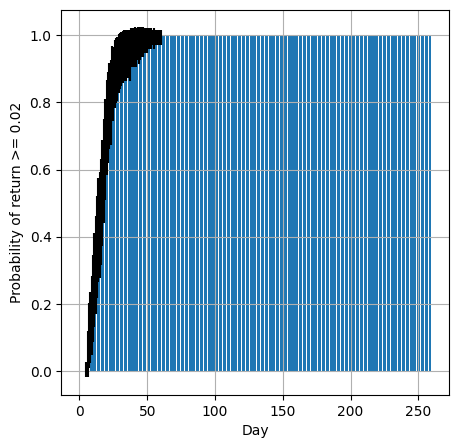

In [125]:
x = range(forecast_days)

plt.rcParams['figure.figsize'] = [5, 5]

plt.bar(x,target_prob_port,yerr = err_bars)

plt.xlabel("Day")
plt.ylabel("Probability of return >= %.2f" % (target_return))

plt.grid()

plt.show()


In [126]:
sharpe_indices = simulated_portfolios.apply(lambda x : np.mean(x)/np.std(x))

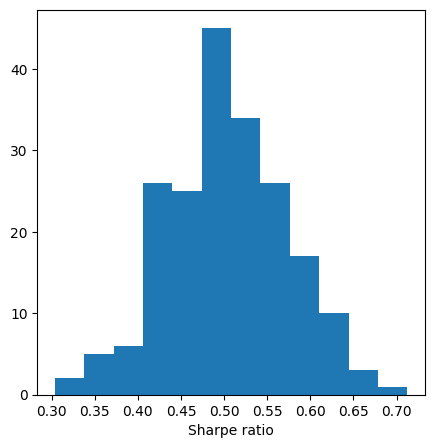

In [127]:
plt.hist(sharpe_indices,bins="rice")
plt.xlabel("Sharpe ratio")

plt.show()

In [128]:
np.mean(sharpe_indices)

0.5035684018555289